<a href="https://colab.research.google.com/github/Andrebarbosalima/Classifica-o-Valida-o-de-modelos-e-m-tricas-de-avalia-o/blob/main/Valida%C3%A7%C3%A3o_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [3]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
x = dados.drop('inadimplente', axis =1)
y = dados['inadimplente']

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [7]:
print(f'Acurácia: {modelo.score(x,y)}')

Acurácia: 1.0


### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

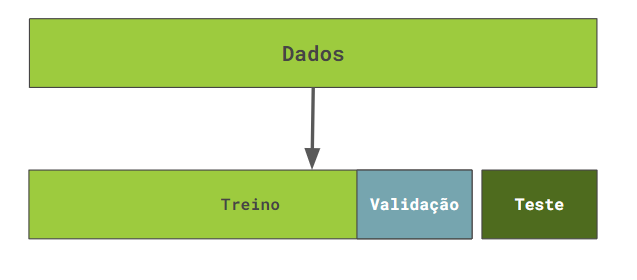

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [10]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8471387509798798


In [11]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205865272938444
Acurácia de validação: 0.9061928403449176


### Avaliando o modelo

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10361   118]
 [  959    43]]


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

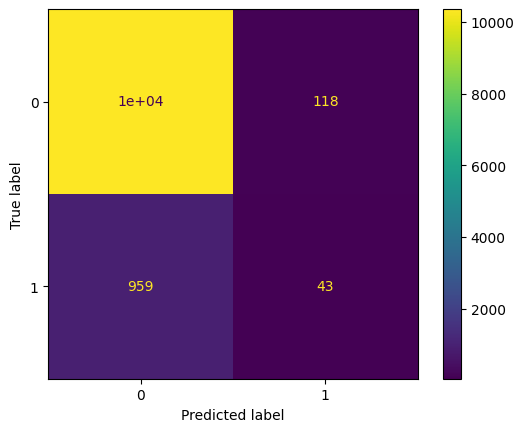

In [15]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

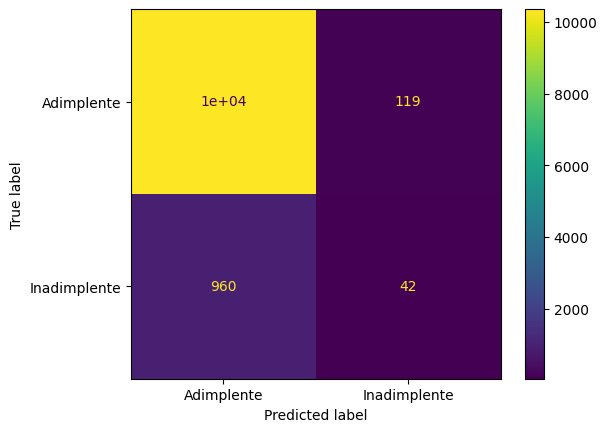

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

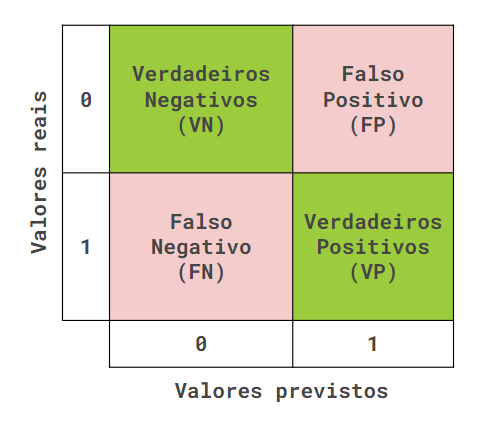

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9061928403449176


In [18]:
from sklearn.metrics import precision_score, recall_score

In [19]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Revocação: {recall_score(y_val, y_previsto)}')

Precisão: 0.2670807453416149
Revocação: 0.04291417165668663


In [20]:
from sklearn.metrics import f1_score

In [21]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.07394668959587275


### Curva ROC

In [22]:
from sklearn.metrics import RocCurveDisplay

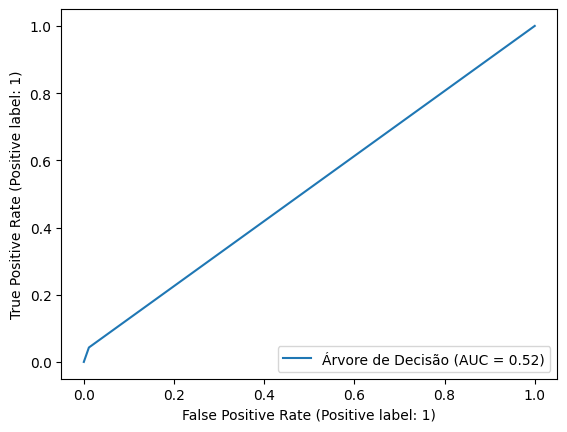

In [23]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5158267775928247


### Curva de precisão x recall

In [26]:
from sklearn.metrics import PrecisionRecallDisplay

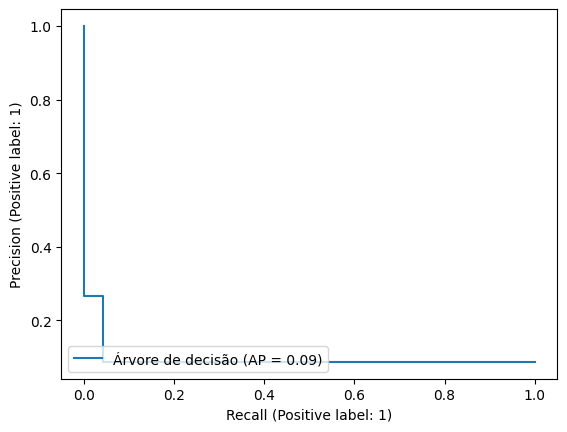

In [27]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [28]:
from sklearn.metrics import average_precision_score

In [29]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09499085824540142


### Relatório de métricas

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.27      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

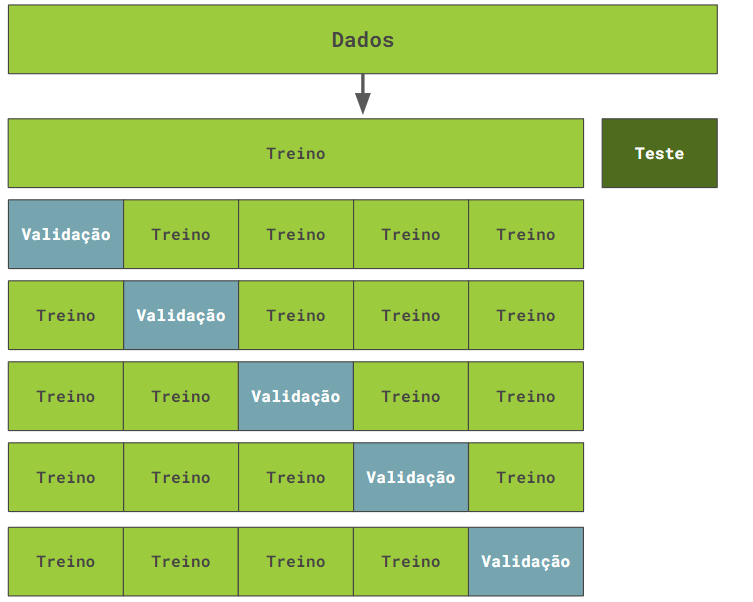

Com este comando, estamos importando duas funções: uma capaz de realizar o processo de validação cruzada e o KFold, que é um dos métodos de validação cruzada.

In [33]:
from sklearn.model_selection import cross_validate, KFold

max_depth corresponde à profundidade máxima e n_splits à quantidade de divisões que serão feitas no nosso conjunto de dados, no caso, cinco partes. O parâmetro shuffle=True embaralha o nosso conjunto de dados antes de dividir em cinco partes. Isso é relevante porque o KFold, por padrão, divide nossos dados na ordem em que eles aparecem na base de dados, o que pode levar a um viés se existir um padrão nessa ordem. Portanto, para evitar o padrão e tornar nosso processo de validação mais robusto, embaralharemos os dados.

Para podermos obter os mesmos resultados nesta divisão, usaremos random_state=5. Se você usar este valor, obterá a mesma divisão e os mesmos resultados do modelo.

Em seguida, armazenaremos os resultados. Como mencionado, o KFold e a validação cruzada gerarão mais de um modelo. Para armazenar os resultados, usaremos a função cross_validate(). Para essa função, passamos os dados que serão divididos. Anteriormente, armazenamos todo o conjunto de treinamento e validação nas variáveis x e y, por isso devemos passá-las. Além disso, passamos cv=kf, que é o método de validação cruzada que usaremos.

In [34]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.20701933, 0.21379495, 0.20904803, 0.20793986, 0.20428896]),
 'score_time': array([0.00392151, 0.00391006, 0.0040195 , 0.00387192, 0.00399327]),
 'test_score': array([0.91246598, 0.90733885, 0.9070122 , 0.91321864, 0.89949913])}

Note que nos é retornado um dicionário com várias informações. A primeira chave do dicionário é fit_time, que é o tempo demorado para ajustar cada um dos modelos. Isso é retornado como um array com cinco resultados, ou seja, o tempo para cada um dos modelos, já que separamos em cinco partes.


O segundo valor do dicionário, score time, representa o tempo levado para calcular cada uma das métricas do nosso modelo.

 Já test_score é o desempenho de cada um dos modelos criados. Como estamos mais interessados no test_score, que é o resultado do modelo, vamos optar por usá-lo ao invés de usarmos todo o dicionário.

Ao invés de analisarmos todos esses valores, vamos tirar uma média e um intervalo de confiança.

O intervalo de confiança nos dirá que, provavelmente, o resultado do nosso modelo ficará entre um valor mínimo e um valor máximo. Portanto, é realmente uma medida de confiança, garantindo que alcançaremos um resultado dentro desse intervalo.

Para construir isso, primeiro vamos pegar cv_resultados, e adicioná-lo na próxima célula. Se acessarmos os colchetes, e passarmos 'test_score', percebemos que, executando essa célula, obteremos apenas o array com as métricas de desempenho. Então, é isso que usaremos para calcular uma média desses resultados e um desvio padrão para definir o intervalo do desempenho.

In [35]:
cv_resultados['test_score']

array([0.91246598, 0.90733885, 0.9070122 , 0.91321864, 0.89949913])

Na célula seguinte, vamos extrair a média, o desvio padrão e criar o intervalo de confiança. Esse intervalo de confiança vai de um ponto mínimo a um ponto máximo. O ponto mínimo é a média menos 2 vezes o desvio padrão; enquanto o ponto máximo é a média mais 2 vezes o desvio padrão. Como nossas métricas têm o valor máximo de 1, colocaremos que o ponto máximo deste intervalo de confiança não deve passar de 1:

In [38]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8980758417735348, 0.9177380752135236]


Ao executar esta célula podemos perceber que, ao utilizar a validação cruzada com KFold, obtivemos um intervalo de confiança de 0.89 até 0.91. Portanto, é mais seguro dizer que o nosso modelo terá um desempenho entre 0.89 e 0.91. Ou seja, está na média de 0.90.

Intervalo de confiança: [0.897977690109337, 0.9186201421008071]

Acontece que essa é a acurácia e estamos interessados, na verdade, no recall. Será que nós podemos utilizar essa validação cruzada para obter também o recall? Veremos a seguir.

### Validação cruzada com recall

Estamos usando o processo de validação cruzada para avaliar o desempenho do nosso modelo de classificação e obtivemos um intervalo de confiança de 0.89 a 0.91. Esse resultado é bem próximo da acurácia obtida pelo processo de validação simples, realizado na divisão entre os dados de treinamento e validação. Entretanto, apesar de serem resultados semelhantes, não significa que isso ocorrerá na maioria das vezes.

O processo de validação cruzada é importante para obter um resultado mais confiável, indicando que o nosso modelo terá um desempenho adequado quando aplicado a dados reais. No entanto, obtivemos um intervalo de confiança para a acurácia, quando a métrica que queremos avaliar é o recall. Essa métrica é mais importante para identificar se a empresa terá prejuízo ou não, isto é, se está conseguindo classificar adequadamente os clientes.

Vamos, então, aplicar o processo de validação cruzada utilizando o recall como métrica de desempenho. Primeiramente, no nosso código, vamos copiar o trecho que cria o intervalo de confiança e criar uma função para facilitar a extração desse intervalo.

In [39]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [40]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.21121359, 0.21040583, 0.20601249, 0.20682383, 0.20714164]),
 'score_time': array([0.00671744, 0.01031446, 0.00657845, 0.00665331, 0.00683761]),
 'test_score': array([0.02509908, 0.02227723, 0.01845018, 0.01827676, 0.02427746])}

In [43]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.015962494651845023, 0.027389787976687292]


O recall que havíamos obtido anteriormente era de aproximadamente 0.04. Logo, esse intervalo de confiança nos indica que é mais seguro afirmar que o nosso recall está dentro desses valores.

Conseguimos entender como usar a validação cruzada com outra métrica, o recall. Porém, ainda estamos utilizando o método KFold, que divide os conjuntos de dados de validação e treinamento em cinco partes, de forma aleatória.

Será que existe uma forma mais adequada para aplicarmos esse processo de validação cruzada em nosso tipo de dado?

### Estratificando os dados

Estamos utilizando um processo muito mais confiável para avaliar o desempenho do nosso modelo de classificação: a validação cruzada. No entanto, estamos usando o método KFold, um tipo de procedimento de validação cruzada que não se baseia em qualquer critério específico. Este método se limita a embaralhar e dividir os dados de forma aleatória.

Se lembrarmos, em nosso conjunto de dados existe um desequilíbrio entre os dados de clientes adimplentes e inadimplentes. Primeiro, vamos verificar essa proporção e, em seguida, explorar como podemos realizar a separação de maneira mais eficaz durante a validação cruzada.

Então, na célula seguinte, vamos escrever a coluna dados['inadimplente']. Em seguida, podemos fazer uma contagem dos valores usando value_counts(), com o argumento normalize = True. Dessa forma, o resultado será apresentado em porcentagem, permitindo-nos ver a proporção.

In [44]:
dados['inadimplente'].value_counts(normalize = True)

0    0.912707
1    0.087293
Name: inadimplente, dtype: float64

Ao executar o código, vemos que nosso conjunto tem cerca de 91% de dados de clientes adimplentes e 8% de dados de clientes inadimplentes.

No processo do KFold, é improvável que esta proporção seja mantida em cada uma das divisões do conjunto de dados. Portanto, precisamos usar uma estratégia para estratificar esses dados, assim como fizemos no processo de divisão simples de treinamento e validação.

Para isso, vamos usar uma função do sklearn, o StratifiedKFold. Em vez de simplesmente utilizar o KFold, ele realiza o KFold de maneira estratificada, levando em conta a proporção de dados de clientes adimplentes e inadimplentes.

In [45]:
from sklearn.model_selection import StratifiedKFold

In [48]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')

In [47]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.020809854988995544, 0.0360616989600893]


Se observarmos o intervalo anterior, ele era de 0.01 até 0.03 - muito similar, mas agora vemos que existe uma maior consistência.

Portanto, o resultado obtido é mais conciso, variando de 0.02 a 0.03, ao invés de 0.01 a 0.03, devido à divisão estratificada dos conjuntos de dados. Isso nos proporciona um resultado mais confiável, considerando a forma como nosso conjunto de dados funciona, devido ao desequilíbrio entre os dados de clientes inadimplentes e adimplentes.

Tendo compreendido que o nosso modelo não está apresentando desempenho satisfatório, temos uma maior confiança de que o resultado obtido é verdadeiro. A seguir, vamos avaliar estratégias que podem ser adotadas para identificar melhor os clientes inadimplentes, de forma que a empresa não sofra tantas perdas financeiras.